# 马尔可夫链的模拟

## 简单的马尔可夫链

假设有3个状态，使用如下转移概率矩阵描述的马尔可夫链：$$Q=\left[\begin{array}{ccc}
0.3 & 0.4 & 0.3\\
0.3 & 0.1 & 0.6\\
0.3 & 0.2 & 0.5
\end{array}\right]$$的模拟如下：

转移矩阵：
 [[0.3 0.4 0.3]
 [0.3 0.1 0.6]
 [0.3 0.2 0.5]]
路径： [0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2]


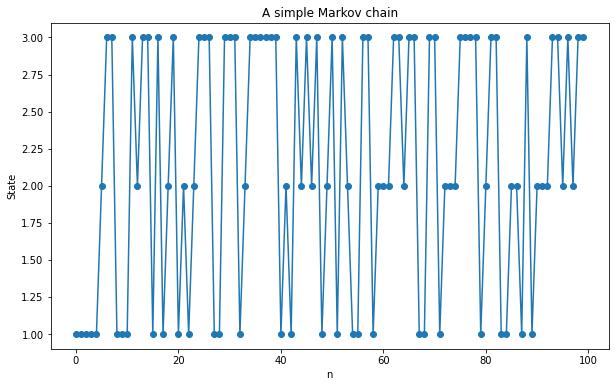

In [1]:
import numpy as np
import numpy.random as nprd

states=[0,1,2] # 状态空间，讲义中为1、2、3，这里方便起见记为0、1、2，最后画图的时候+1即可。
current_state=0 # 从0出发
Path=[0] # 初始化路径
Q=np.array([[0.3,0.4,0.3],[0.3,0.1,0.6],[0.3,0.2,0.5]])
print("转移矩阵：\n",Q)
## 定义转移函数
def trans(x,Q):
    prob=Q[x] #提取出Q矩阵的第x行，比如第0行为[0.3,0.4,0.3]
    cum_prob=np.add.accumulate(prob) #将prob累加，比如第0行累加后得到[0.3,0.7,1.0]
    u=nprd.random() #产生一个(0,1)上的均匀分布随机数
    s=0
    while u>=cum_prob[s]:
        s+=1
    return s

N=99 # 时间长度
for i in range(N):
    current_state=trans(current_state, Q)
    Path.append(current_state)
print("路径：",Path)

## 画图
## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 6.0)
fig=plt.figure()
plt.scatter(np.linspace(0,N,N+1),np.array(Path)+1) ##画出路径点，
plt.plot(np.linspace(0,N,N+1),np.array(Path)+1) ##画出路径线
plt.xlabel('n')
plt.ylabel("State")
plt.title('A simple Markov chain')
plt.show() ## 画图
fig.savefig("simple_markov.pdf") ## 保存文件

## 随机游走的模拟

接下来我们模拟随机游走，即转移概率为：$$P\left(X_{n}=i+1|X_{n-1}=i\right)=0.5$$ $$P\left(X_{n}=i-1|X_{n-1}=i\right)=0.5$$

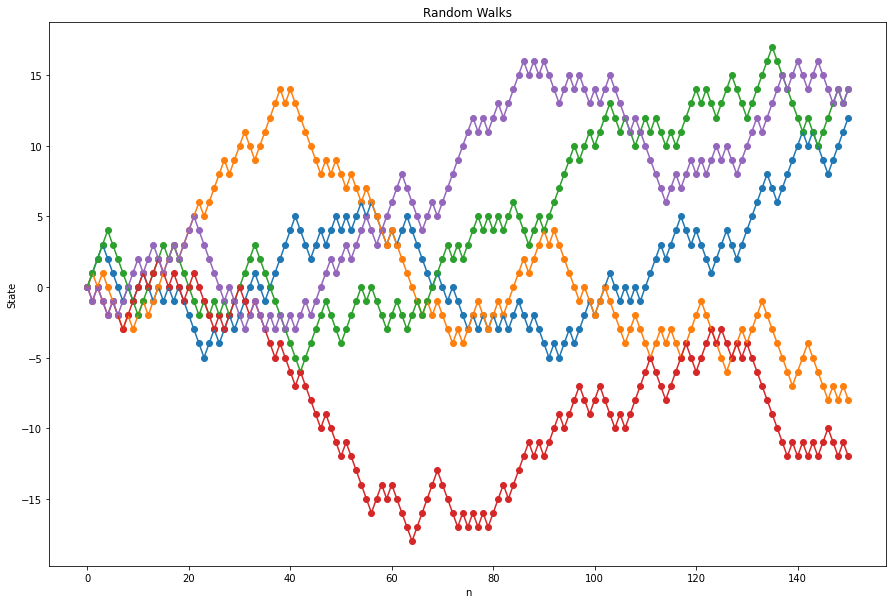

In [2]:
import numpy as np
import numpy.random as nprd

def random_walk(N):
    current_state=0 # 从0出发
    Path=[0] # 初始化路径
    ## 定义转移函数
    def trans(x):
        u=nprd.random() #产生一个(0,1)上的均匀分布随机数
        if u<0.5:
            return x+1
        else:
            return x-1

    for i in range(N):
        current_state=trans(current_state)
        Path.append(current_state)
    return Path

N=150
Path1=random_walk(N)
Path2=random_walk(N)
Path3=random_walk(N)
Path4=random_walk(N)
Path5=random_walk(N)
## 画图
## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 10.0)
fig=plt.figure()
plt.scatter(np.linspace(0,N,N+1),np.array(Path1)) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path1)) ##画出路径线
plt.scatter(np.linspace(0,N,N+1),np.array(Path2)) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path2)) ##画出路径线
plt.scatter(np.linspace(0,N,N+1),np.array(Path3)) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path3)) ##画出路径线
plt.scatter(np.linspace(0,N,N+1),np.array(Path4)) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path4)) ##画出路径线
plt.scatter(np.linspace(0,N,N+1),np.array(Path5)) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path5)) ##画出路径线
plt.xlabel('n')
plt.ylabel("State")
plt.title('Random Walks')
plt.show() ## 画图
fig.savefig("markov_random_walk.pdf") ## 保存文件

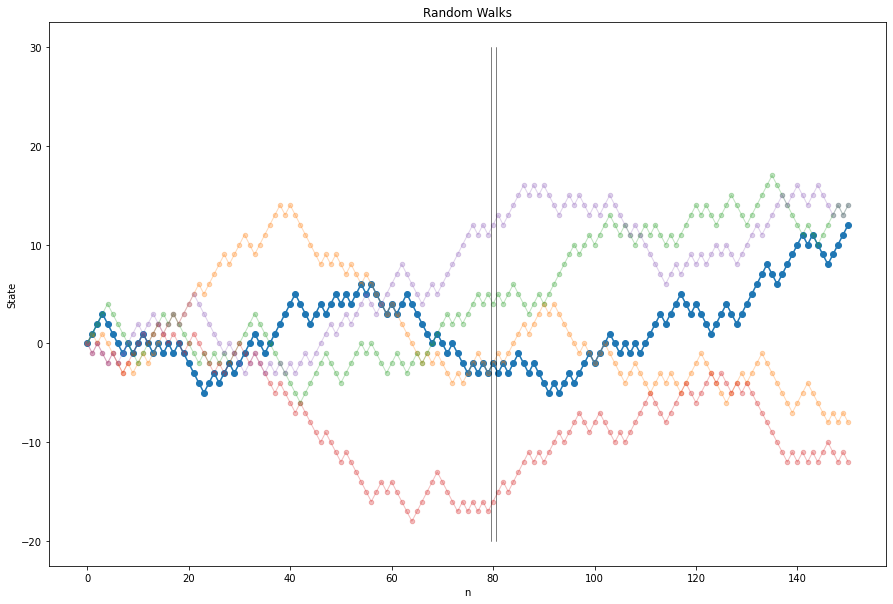

In [3]:
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 10.0)
fig=plt.figure()
plt.scatter(np.linspace(0,N,N+1),np.array(Path1)) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path1)) ##画出路径线
plt.scatter(np.linspace(0,N,N+1),np.array(Path2),alpha=0.3,s=20) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path2),alpha=0.3,linewidth=1) ##画出路径线
plt.scatter(np.linspace(0,N,N+1),np.array(Path3),alpha=0.3,s=20) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path3),alpha=0.3,linewidth=1) ##画出路径线
plt.scatter(np.linspace(0,N,N+1),np.array(Path4),alpha=0.3,s=20) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path4),alpha=0.3,linewidth=1) ##画出路径线
plt.scatter(np.linspace(0,N,N+1),np.array(Path5),alpha=0.3,s=20) ##画出路径点
plt.plot(np.linspace(0,N,N+1),np.array(Path5),alpha=0.3,linewidth=1) ##画出路径线
plt.plot(np.array([79.5,79.5]),np.array([-20,30]),color='black',linewidth=0.5)
plt.plot(np.array([80.5,80.5]),np.array([-20,30]),color='black',linewidth=0.5)
plt.xlabel('n')
plt.ylabel("State")
plt.title('Random Walks')
plt.show() ## 画图
fig.savefig("stochastic_path.pdf") ## 保存文件

而对于一个二维的随机游走：$$q_{\left(i,j\right),\left(i,j+1\right)}=q_{\left(i,j\right),\left(i,j-1\right)}=q_{\left(i,j\right),\left(i+1,j\right)}=q_{\left(i,j\right),\left(i-1,j\right)}=\frac{1}{4}$$

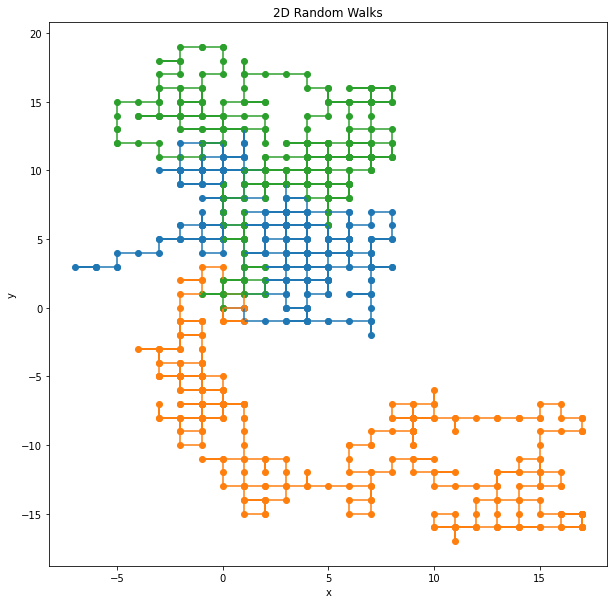

In [4]:
import numpy as np
import numpy.random as nprd

def random_walk(N):
    current_state_x,current_state_y=0,0 # 从(0,0)出发
    Path_x=[0] # 初始化路径
    Path_y=[0] # 初始化路径
    ## 定义转移函数
    def trans(x,y):
        u=nprd.random() #产生一个(0,1)上的均匀分布随机数
        if u<0.25:
            return x+1,y
        elif u<0.5:
            return x-1,y
        elif u<0.75:
            return x,y+1
        else:
            return x,y-1

    for i in range(N):
        current_state_x,current_state_y=trans(current_state_x,current_state_y)
        Path_x.append(current_state_x)
        Path_y.append(current_state_y)
    return Path_x,Path_y

N=299
Path_x1,Path_y1=random_walk(N)
Path_x2,Path_y2=random_walk(N)
Path_x3,Path_y3=random_walk(N)
## 画图
## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 10.0)
fig=plt.figure()
plt.scatter(np.array(Path_x1),np.array(Path_y1)) ##画出路径点
plt.plot(np.array(Path_x1),np.array(Path_y1)) ##画出路径线
plt.scatter(np.array(Path_x2),np.array(Path_y2)) ##画出路径点
plt.plot(np.array(Path_x2),np.array(Path_y2)) ##画出路径线
plt.scatter(np.array(Path_x3),np.array(Path_y3)) ##画出路径点
plt.plot(np.array(Path_x3),np.array(Path_y3)) ##画出路径线
plt.xlabel('x')
plt.ylabel("y")
plt.title('2D Random Walks')
plt.show() ## 画图
fig.savefig("markov_random_walk2d.pdf") ## 保存文件

## 马尔可夫链的大数定律

在马尔可夫链的大数定律中，有两个重要结论，其中第一个结论是：$$L_{n}\left(j\right)\overset{\textrm{a.s.}}{\rightarrow}\frac{V_{ij}}{\mathbb{E}\left(T_{i}|X_{0}=i\right)}$$ 其中$L_{n}\left(j\right)$即马尔可夫链经过$n$步之后经过状态$j$的比例；$\mathbb{E}\left(T_{i}|X_{0}=i\right)$为从状态$i$出发第一次回到状态$i$的平均时间长度；$V_{ij}$为从状态$i$出发第一次回到状态$i$这段时间经过状态$i$的平均次数。

而第二个结论是，对于常返的状态$i$，有：$$L_{n}\left(i\right)\overset{\textrm{a.s.}}{\rightarrow}\frac{1}{\mathbb{E}\left(T_{i}|X_{0}=i\right)}$$

我们使用3个食堂的例子，验证以上结论。实际上，我们在讲义中已经计算出，$\mathbb{E}\left(T_{1}|X_{0}=1\right)=\frac{10}{3}$，我们下面将使用以下结论。

In [5]:
import numpy as np
import numpy.random as nprd

Q=np.array([[0.3,0.4,0.3],[0.3,0.1,0.6],[0.3,0.2,0.5]])

def get_path(N):
    states=[0,1,2] # 状态空间，讲义中为1、2、3，这里方便起见记为0、1、2，最后画图的时候+1即可。
    current_state=0 # 从0出发
    Path=[0] # 初始化路径
    ## 定义转移函数
    def trans(x,Q):
        prob=Q[x] #提取出Q矩阵的第x行，比如第0行为[0.3,0.4,0.3]
        cum_prob=np.add.accumulate(prob) #将prob累加，比如第0行累加后得到[0.3,0.7,1.0]
        u=nprd.random() #产生一个(0,1)上的均匀分布随机数
        s=0
        while u>=cum_prob[s]:
            s+=1
        return s

    for i in range(N-1):
        current_state=trans(current_state, Q)
        Path.append(current_state)
    return [i+1 for i in Path]

N=5000
Path=get_path(N) ## 产生路径
## 计算L_n(1)，即5000步以内在状态1的比率
Nn1=sum([i==1 for i in Path])
Ln1=Nn1/len(Path)
print("%s步以内共有%s个状态1，占比%s" % (N,Nn1,Ln1))
## 将马尔可夫链按照状态1进行分割
Eta=[]
eta=None #初始化
# 切割：
for s in Path:
    if s==1:
        Eta.append(eta)
        eta=[1]
    else:
        eta.append(s)
del Eta[0]
lines=1 #仅仅是计数
print("---------切割的eta-------------")
for eta in Eta:
    lines+=1
    if lines<=20: ## 只打印前20个。
        print(eta)
    else:
        print("......")
        break
        
## 计算每个eta的长度
ET1=sum([len(eta) for eta in Eta])/len(Eta)
print("从状态1返回状态1的平均时间长度为%s，倒数为%s"%(ET1,1/ET1))

5000步以内共有1490个状态1，占比0.298
---------切割的eta-------------
[1, 2, 3, 3]
[1, 3, 3]
[1, 2]
[1, 2, 3, 3, 3, 2, 2, 3]
[1, 2, 3, 2, 3, 3]
[1, 2]
[1, 2, 3, 2]
[1]
[1, 3]
[1]
[1]
[1, 2, 3, 3, 3]
[1, 3, 3, 3, 3, 3]
[1, 3, 3, 3]
[1, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3]
[1, 2, 3]
[1, 2, 3, 2]
[1, 2, 2]
[1, 2, 3, 3, 3]
......
从状态1返回状态1的平均时间长度为3.3559435862995297，倒数为0.29797878727236343


## 马尔可夫链的平稳分布

### 平稳分布的含义

平稳分布即当马尔可夫链运行了足够长的时间后，$X_n$的分布是否会达到一个不变的分布。在此我们用以下模拟来说明这个定义：

In [6]:
import numpy as np
import numpy.random as nprd

Q=np.array([[0.3,0.4,0.3],[0.3,0.1,0.6],[0.3,0.2,0.5]])

def get_path(N):
    states=[0,1,2] # 状态空间，讲义中为1、2、3，这里方便起见记为0、1、2，最后画图的时候+1即可。
    current_state=0 # 从0出发
    Path=[0] # 初始化路径
    ## 定义转移函数
    def trans(x,Q):
        prob=Q[x] #提取出Q矩阵的第x行，比如第0行为[0.3,0.4,0.3]
        cum_prob=np.add.accumulate(prob) #将prob累加，比如第0行累加后得到[0.3,0.7,1.0]
        u=nprd.random() #产生一个(0,1)上的均匀分布随机数
        s=0
        while u>=cum_prob[s]:
            s+=1
        return s

    for i in range(N-1):
        current_state=trans(current_state, Q)
        Path.append(current_state)
    return [i+1 for i in Path]

M=1000 ##产生1000条马尔可夫链
N=400 ##每条马尔可夫链的长度
Xfinal=[]
for i in range(M):
    path=get_path(N) ##获取路径
    x=path[300] ##每条马尔可夫链第300个状态
    Xfinal.append(x)
print("%s条马尔可夫链路径的第300个状态：" % M)
print(Xfinal)
## 计算每个状态的分布
print("-------------")
p1=sum([i==1 for i in Xfinal])/len(Xfinal)
p2=sum([i==2 for i in Xfinal])/len(Xfinal)
p3=sum([i==3 for i in Xfinal])/len(Xfinal)
print("第300个状态的分布为：[%s,%s,%s]" % (p1,p2,p3))

1000条马尔可夫链路径的第300个状态：
[3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3, 3, 1, 1, 1, 3, 2, 2, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 1, 3, 3, 2, 1, 1, 3, 2, 3, 1, 2, 1, 2, 1, 1, 3, 3, 3, 2, 3, 1, 1, 2, 2, 3, 2, 3, 3, 1, 2, 2, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 2, 2, 3, 1, 2, 3, 1, 1, 3, 1, 2, 1, 3, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 2, 3, 1, 2, 1, 3, 3, 2, 3, 3, 3, 1, 2, 3, 1, 3, 3, 3, 3, 2, 3, 1, 3, 3, 1, 1, 3, 3, 2, 2, 1, 3, 1, 1, 1, 3, 3, 3, 2, 1, 2, 1, 2, 1, 3, 3, 2, 3, 1, 3, 3, 2, 1, 3, 3, 1, 3, 3, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 1,

### 平稳分布的计算

根据理论，马尔可夫链的平稳分布应该满足：$$\pi Q=\pi$$对于遍历的马尔可夫链，为了计算平稳分布，可以通过:$$Q'\pi'=\pi'$$即计算$Q'$的特征向量实现：

In [7]:
import numpy as np

Q=np.array([[0.3,0.4,0.3],[0.3,0.1,0.6],[0.3,0.2,0.5]])
Qt=np.transpose(Q)
print("Q的转置：\n",Qt)
eig_value,eig_vector=np.linalg.eig(Qt)
print("特征值：",eig_value)
print("特征向量：\n",eig_vector)
pi=eig_vector[:,0] ##取出第一列
pi=pi/sum(pi) ##标准化为概率分布
print("平稳分布：",pi)
print("-------------")
Q2=np.dot(Q,Q)
print("Q的2次方:\n",Q2)
Q4=np.dot(Q2,Q2)
print("Q的4次方:\n",Q4)
Q8=np.dot(Q4,Q4)
print("Q的8次方:\n",Q8)
Q16=np.dot(Q8,Q8)
print("Q的16次方:\n",Q16)

Q的转置：
 [[0.3 0.3 0.3]
 [0.4 0.1 0.2]
 [0.3 0.6 0.5]]
特征值： [ 1.00000000e+00 -2.10335221e-17 -1.00000000e-01]
特征向量：
 [[ 4.99427065e-01  2.67261242e-01 -3.63298574e-17]
 [ 3.93487991e-01  5.34522484e-01 -7.07106781e-01]
 [ 7.71841828e-01 -8.01783726e-01  7.07106781e-01]]
平稳分布： [0.3        0.23636364 0.46363636]
-------------
Q的2次方:
 [[0.3  0.22 0.48]
 [0.3  0.25 0.45]
 [0.3  0.24 0.46]]
Q的4次方:
 [[0.3    0.2362 0.4638]
 [0.3    0.2365 0.4635]
 [0.3    0.2364 0.4636]]
Q的8次方:
 [[0.3        0.23636362 0.46363638]
 [0.3        0.23636365 0.46363635]
 [0.3        0.23636364 0.46363636]]
Q的16次方:
 [[0.3        0.23636364 0.46363636]
 [0.3        0.23636364 0.46363636]
 [0.3        0.23636364 0.46363636]]
